In [91]:
import pandas as pd
from sklearn.datasets import load_iris

In [92]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [93]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [94]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [95]:
df['flower name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [96]:
import matplotlib.pyplot as plt

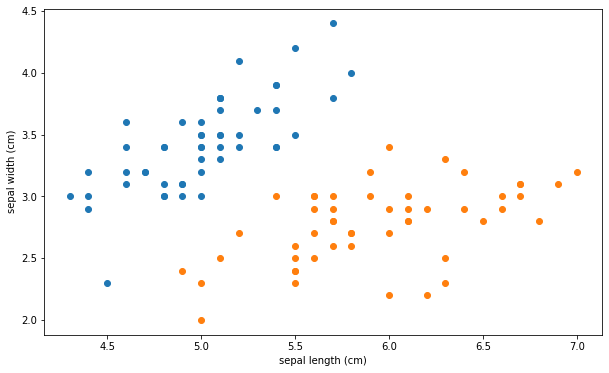

In [97]:
plt.figure(figsize=(10,6))

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(df[df.target==0]['sepal length (cm)'],df[df.target==0]['sepal width (cm)'])
plt.scatter(df[df.target==1]['sepal length (cm)'],df[df.target==1]['sepal width (cm)'])

plt.show()

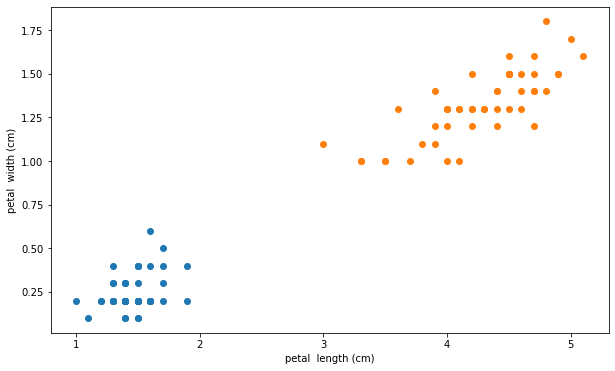

In [98]:
plt.figure(figsize=(10,6))

plt.xlabel('petal  length (cm)')
plt.ylabel('petal  width (cm)')

plt.scatter(df[df.target==0]['petal length (cm)'],df[df.target==0]['petal width (cm)'])
plt.scatter(df[df.target==1]['petal length (cm)'],df[df.target==1]['petal width (cm)'])

plt.show()

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X = df.drop(df.columns[-2:], axis=1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [101]:
y = df.target

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [103]:
from sklearn.svm import SVC
model = SVC()

In [104]:
model.fit(X_train,y_train)

SVC()

In [105]:
model.score(X_test,y_test)

0.9666666666666667

hyperparameter optimization

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [108]:
grid_search = GridSearchCV(model, param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [109]:
print("En iyi parametreler: ", grid_search.best_params_)
print("En iyi doğruluk oranı: ", grid_search.best_score_)

En iyi parametreler:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
En iyi doğruluk oranı:  0.9666666666666666


In [110]:
# En iyi modeli seçme
best_model = grid_search.best_estimator_

In [111]:
# Test veri seti üzerinde modelin performansını değerlendirme
accuracy = best_model.score(X_test, y_test)
print("Test doğruluk oranı: ", accuracy)

Test doğruluk oranı:  1.0
